# What is probability? A simulated introduction

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Probability

* Introduce the concept of probability: if I flip a _fair coin_, it will have 50% probability coming up heads. We can simulate this using `numpy`'s random number generator.

To do so, first note we can use `np.random.rand()` to randomly select floats between 0 and 1 (c.f. uniform distribution). Below, we do so and plot a histogram:

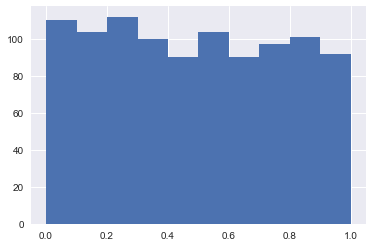

In [2]:
x = np.random.rand(1000)
plt.hist(x);

To then simulate the coin flip(s), we check whether each float was greater or less than 0.5. If greater than or equal to 0.5, we say it's a head.

In [3]:
flips = x >= 0.5
heads = sum(flips)
f"Number of heads = {heads}"

'Number of heads = 484'

The probability of heads can be calculated as the total number of heads over the total number of flips:

In [4]:
f"P(heads) = {heads/len(flips)}"

'P(heads) = 0.484'

### Hands-on: biased coin

What if probability of heads is 0.7 (give real-world examples such as disease incidence and click-through rates)? 

In [5]:
# Solution
flips = x >= 0.7
heads = sum(flips)
f"Number of heads = {heads}"

'Number of heads = 290'

You can also calculate probabilities with real-world data. Here we import a dataset of Finch beak measurements from the Galápagos islands (more context)

In [6]:
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [7]:
lengths = df_12.blength

* What is the probability of a bird having a beak length > 10 ?

In [8]:
p = (sum(lengths > 10))/len(lengths)
p

0.85080645161290325

We can also calculate this in the simulation/hacker statistics way by drawing random samples (with replacement) from the data, seeing how many lengths are > 10 and calculating the proportion:

In [9]:
n_samples = 10000
sum(np.random.choice(lengths,n_samples, replace=True) > 10)/n_samples

0.85219999999999996

## Another way to simulate coin-flips

Use the binomial distribution (describe and motivate):
* If P(heads) = 0.3 and you flip the coin ten times, how many heads will come up?



In [10]:
# Simulate one run of flipping the biased coin 10 times
np.random.binomial(10,0.3)

4

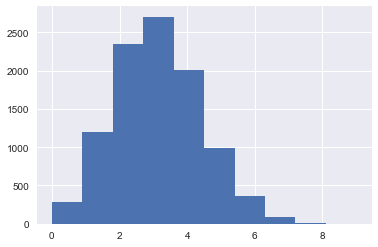

In [11]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(10,0.3,10000)

# Plot histogram of results
plt.hist(x);

* Group chat: what do you see in the above?

## Hands-on

If I flip a biased coin (P(H)=0.3) 20 times, what is the probability of 5 or more heads?

In [12]:
# Solution
sum(np.random.binomial(10,0.3,10000) >= 5)/10000

0.14999999999999999

If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [13]:
sum(np.random.binomial(20,0.5,10000) >= 5)/10000

0.99480000000000002

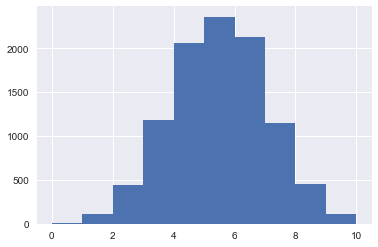

In [14]:
# always good to plot stuff
x = np.random.binomial(10,0.5,10000)
plt.hist(x);

## Joint Probability

We have really already encountered joint probabilities above: $P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring:
* For example, getting two heads in a row.
If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$

### HANDS-ON

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads):

0.044


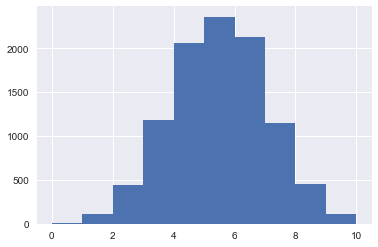

In [15]:
# Calculate P(A,B)
x_0 = np.random.binomial(2,0.5,10000)
p_ab = sum(x==2)/len(x)
plt.hist(x);
print(p_ab)

In [16]:
x_1 = np.random.binomial(1,0.5,10000)
x_2 = np.random.binomial(1,0.5,10000)
p_a = sum(x_1 == 1)/len(x_1)
p_b = sum(x_2 == 1)/len(x_2)
p_a*p_b

0.24969909000000001

In [17]:
## HANDS-ON: joint probability for birds

What is the probability that two randomly selected birds have beak depths over 10 ?

In [18]:
p_a = (sum(lengths > 10))/len(lengths)
p_b = (sum(lengths > 10))/len(lengths)
p_a*p_b

0.72387161810613943

* Calculate the joint probability using the resampling method.
First calculate $P(A)P(B)$:

In [19]:
n_samples = 10000
p_a = sum(np.random.choice(lengths,n_samples, replace=True) > 10)/n_samples
p_b = sum(np.random.choice(lengths,n_samples, replace=True) > 10)/n_samples
p_a*p_b

0.72454108000000006

Now calculate $P(A,B)$:

In [20]:
n_samples = 100000
samples = np.random.choice(lengths,(n_samples,2), replace=True)
_ = samples > (10,10)
#type(_[0,0])
#_[0,0]
p_ab = sum(np.prod(_, axis=1))/n_samples
p_ab

0.72367999999999999

## Conditional Probability

Introduce conditional probability $P(A|B)$. Give example. Show how conditional and joint probabilites are related:
$$ P(A,B) = P(A|B)P(B)$$

### Hands-on: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [21]:
sum(df_12.blength > 10)/len(df_12)

0.85080645161290325

In [22]:
sum(df_12.loc[df_12.species == 'fortis'].blength > 10)/len(df_12.loc[df_12.species == 'fortis'])

0.69421487603305787

In [23]:
sum(df_12.loc[df_12.species == 'scandens'].blength > 10)/len(df_12.loc[df_12.species == 'scandens'])

1.0

## Bayes Theorem

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

Explain and derive!

### Example: drug testing

Create variant on the following example from wikipedia:

**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$



We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.

Calculating this explicitly yields

$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

### Hands-on: discover the above using simulation

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to get out the same result as above:

In [24]:
# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = np.random.binomial(n,0.005,1) 
non_users = n - users

In [25]:
# How many of these users tested +ve ?
u_pos = np.random.binomial(users,0.99)
# How many of these non-users tested +ve ?
non_pos = np.random.binomial(non_users,0.01)

In [26]:
# how many of those +ve tests were for users?
u_pos/(u_pos+non_pos)

array([ 0.33625337])

Coming up: from Bayes Theorem to Bayesian Inference!